# Explorative Datenanalyse Part 1

## Imports

Der Einfachheit halber regelt config.py alle Imports. Alle Module liegen in einem Package rnaloops \
und sollten nur außerhalb von diesem importiert werden (um relative import Probleme zu vermeiden). \
Wir brauchen nur alle Module aus config.py in einem neuen Notebook zu importieren und haben alles benötigte zur Verfügung. \
User-definierte Funktionen zur EDA liegen z.B. in rnaloops.data_explorer.explore_fcts und werden automatisch importiert.

In [5]:
from config import *

## Daten laden und prüfen

Daten liegen in rnaloops/data in verschiedenen Formaten. Am besten ist .pkl um gegebenenfalls Metadaten der DatFrames mit zu speichern. \
Es gibt eine Datei mit Daten nach parsing aus den pdfs (rnaloops_data) und eine aufbereitete (rnaloops_data_prepared). Hier ein Vergleich der Spalten:

In [8]:
df_raw = get_df()  # Fct from getter_fcts.py to load parsed data
df = get_prepared_df()  # Fct from getter_fcts.py to load prepared data 
compare_raw_and_prepared(df_raw, df)  # Fcts to compare them, i.e. RAM use

# Note on string memory reduction:
# Reduction in memory for string type columns due to switch from string to 
# string arrow, which is shown as string by pandas. The difference emerges 
# sice string arrow avoids python overhead on strings (the shorter the strings
# the better the improvement).

# Note on data getting:
# Data is aquired by screening online db in relevant index range and download
# from all pages showing structures. Infos are downloaded as pdf and first
# parsed in plain files, then in a single table. By this we retrieve all
# information on the structure provided by the online db, EXCEPT the first and
# second strand of the conection helices, which (for unknown reasons) is given
# in pdf, but has always value '-'. At his point we dont need that info.
# For more details on the process to get rnaloops_data.pkl check data_getter.py.

/home/lukas/Projects/RNALoops


,raw_name,new_name,raw_dtype,new_dtype,raw_MB,prep_MB,diff_MB
0,Index,Index,int64,int64,0.644728,0.601768,0.042960
0,Loop type,loop_type,int64,category,0.644728,0.076277,0.568451
1,Home structure (PDB id),home_structure,string,category,4.926122,0.261237,4.664885
2,DB notation,db_notation,string,string,13.277000,3.920131,9.356869
3,Whole Sequence,whole_sequence,string,category,13.277000,0.552347,12.724653
4,Length (bps) 1,helix_1_bps,float64,int8,0.644728,0.075221,0.569507
18,Length (nts) 1,strand_1_nts,float64,int16,0.644728,0.150442,0.494286
32,End position 1,end_1,string,string,4.931360,0.666057,4.265303
46,Euler Angle X 1,euler_x_1,float64,float32,0.644728,0.300884,0.343844
60,Start position 1,start_1,string,string,4.929873,0.664666,4.265207


Wir sehen nicht alle der 144 Spalten, wo eine 1 im Namen steht gibt es immer 14, eine für jeden (möglichen) Stem. \
Der DataFrame trägt auch eine Funktion um Spalten infos auszugeben, wir können hier später alles relevante ergänzen:

In [9]:
df.columns_info()


Information on RNALoops DataFrame columns: 

- loop_type (int8, NOT NULL): Any of 3-14 = number of structure stems 

- home_structure (category, NOT NULL): Where the structure is found in PDB 

- db_notation (str_arrow, NOT NULL): bracket notation, explanation see e.g. 
https://www.tbi.univie.ac.at/RNA/ViennaRNA/doc/html/rna_structure_notations.html#dot-bracketnotation 

- whole_sequence (str_arrow, NOT NULL): The base sequence of the structure 

- helix_{1...14}_bps (int8): Length of helices 1...14 in base pairs, -1 for non existent, at least 1, 2 and 3 must not be -1, to have a multiloop 

- strand_{1...14}_nts (int16): Length of strands 1...14 in units, again -1 for non existent, can be 0 if two helices are next to each other 

- start_{1...14} (str_arrow): The start position of strand 1...14 

- end_{1...14} (str_arrow): The end position of strand 1...14 

- euler_{x|y|z}_{1...14} (float32, 0<=...<=180): Euler angles in ° of strand 1...14 in x, y and z 

- planar_{x|y|z}_{1...14} 

Beim Präparieren wurden Spaltennamen vereinfacht und Dateitypen angepasst um Memory zu sparen (vgl. data_getter.getter_fcts.prepare_df). \
Im Folgenden konzentrieren wir und vor allem auf die numerischen Spalten und ggbf. die kategorischen zur Gruppierung der Daten. \
Wir können diese nochmal genauer angucken:

In [10]:
df.describe()

,helix_1_bps,helix_2_bps,helix_3_bps,helix_4_bps,helix_5_bps,helix_6_bps,helix_7_bps,helix_8_bps,helix_9_bps,helix_10_bps,helix_11_bps,helix_12_bps,helix_13_bps,helix_14_bps,strand_1_nts,strand_2_nts,strand_3_nts,strand_4_nts,strand_5_nts,strand_6_nts,strand_7_nts,strand_8_nts,strand_9_nts,strand_10_nts,strand_11_nts,strand_12_nts,strand_13_nts,strand_14_nts,euler_x_1,euler_x_2,euler_x_3,euler_x_4,euler_x_5,euler_x_6,euler_x_7,euler_x_8,euler_x_9,euler_x_10,euler_x_11,euler_x_12,euler_x_13,euler_x_14,euler_y_1,euler_y_2,euler_y_3,euler_y_4,euler_y_5,euler_y_6,euler_y_7,euler_y_8,euler_y_9,euler_y_10,euler_y_11,euler_y_12,euler_y_13,euler_y_14,euler_z_1,euler_z_2,euler_z_3,euler_z_4,euler_z_5,euler_z_6,euler_z_7,euler_z_8,euler_z_9,euler_z_10,euler_z_11,euler_z_12,euler_z_13,euler_z_14,planar_1,planar_2,planar_3,planar_4,planar_5,planar_6,planar_7,planar_8,planar_9,planar_10,planar_11,planar_12,planar_13,planar_14
count,75221.000000,75221.000000,75221.000000,75221.000000,75221.000000,75221.000000,75221.000000,75221.000000,75221.000000,75221.000000,75221.000000,75221.000000,75221.000000,75221.000000,75221.000000,75221.000000,75221.000000,75221.000000,75221.000000,75221.000000,75221.000000,75221.000000,75221.000000,75221.00000,75221.000000,75221.000000,75221.000000,75221.000000,75221.000000,75221.000000,75221.000000,44410.000000,24637.000000,13340.000000,10001.000000,6599.000000,3756.000000,2251.000000,2041.000000,414.000000,280.000000,241.000000,75221.000000,75221.000000,75221.000000,44410.000000,24637.000000,13340.000000,10001.000000,6599.000000,3756.000000,2251.000000,2041.000000,414.000000,280.000000,241.000000,75221.000000,75221.000000,75221.000000,44410.000000,24637.000000,13340.000000,10001.000000,6599.000000,3756.000000,2251.000000,2041.000000,414.000000,280.000000,241.000000,75221.000000,75221.000000,75221.000000,44410.000000,24637.000000,13340.000000,10001.000000,6599.000000,3756.000000,2251.000000,2041.000000,414.000000,280.000000,241.000000
mean,2.986161,3.312798,2.595512,1.169873,0.067720,-0.508329,-0.646216,-0.801252,-0.887292,-0.931455,-0.929966,-0.988886,-0.992555,-0.993592,2.633573,3.254862,2.823919,0.847928,0.201367,-0.492469,-0.556706,-0.679850,-0.852780,-0.92425,-0.888435,-0.975539,-0.988753,-0.987743,105.243668,92.838303,101.747910,96.028305,86.446350,71.941940,80.086456,93.230118,98.241074,81.227737,90.753967,33.941204,110.513512,105.032585,100.602242,92.282883,102.793251,98.956909,84.322845,64.243683,81.656464,85.596191,99.912918,80.360725,98.812202,68.824989,110.439041,109.347687,101.394478,93.227936,101.522522,97.837502,85.630089,64.948853,77.563683,89.301270,96.606270,75.432381,99.772774,60.882175,125.201912,103.518883,101.654655,92.517014,102.317764,97.761093,86.033241,67.771423,81.429741,88.548126,98.916649,78.473328,96.354645,52.091805,114.483894,103.962410
std,2.388293,2.670053,2.020893,2.498692,1.952599,1.282706,1.137205,0.731801,0.551550,0.427930,0.532674,0.151598,0.121796,0.113025,2.728885,3.116780,2.837172,2.630218,2.243875,1.453164,1.370781,1.216916,0.765183,0.61757,0.757220,0.388361,0.229981,0.254152,50.970673,56.794483,53.420174,54.803646,50.587391,60.333614,53.069675,51.064781,60.392536,48.091969,54.526382,31.647486,53.463257,70.267899,51.771679,56.380672,52.734119,54.479156,53.785870,56.132008,52.366680,53.493900,61.777218,60.984196,61.791641,54.731640,54.244652,56.799435,51.837399,55.900951,53.503819,55.242184,52.745186,54.542343,53.711147,53.725685,60.490429,55.858627,58.359795,53.534912,59.071404,60.806770,38.678825,45.386234,41.058601,43.735291,41.203915,48.573021,39.314079,42.984428,52.885262,43.649445,52.159992,37.641174,47.978886,58.348415
min,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

Wir haben nur noch 75222 Einträge. Laut Autoren sollen 84261 Strukturen vorliegen, es konnen aber nur knapp 80k heruntergeladen werden. \
Der Rest existiert entweder nicht oder ist sehr gut versteckt ;) ... Außerdem gibt es ca. 2300 Strukturen ohne Infos, die auch entfernt wurden. \
Dazu sind ~3000 Strukturen doppelt vorhanden, die Duplikate wurden auch entfernt.

Spalten die keine Daten enthalten sollten, weil die Struktur weniger als 14 stems hat werden wie folgt behandelt:
- Bei Winkeln wird NaN gesetzt (okay da Winkel ohnehin floats)
- Bei Längen wird -1 gesetzt (NaN nicht sinnvoll bei int, 0 verwirrend weil Strands mit Länge 0 tatsächlich existieren)
- Bei Positionen und Sequenzen wird NA gesetzt (es gibt auch '-', was so in der DB steht und heißt der Wert ist unbekannt?)
- Beim Gruppieren nach loop_type können die Spalten einfach weggelassen werden

## Ein paar Beispiele

Vor den ersten zusammenfassenden Statistiken auf den Daten erstmal ein paar Beispiele für Strukturen. \
Wir können eine einzelne Struktur mittels show_structure() aus explore_fcts als pd.Series erhalten. Dabei haben wir die Optionen:
- indices (int | Iterable): Liste/int = Gewünschte(r) Struktur idx (default: n zufällige Indices, wähle n beliebig)
- web (bool): Zeigt Website der Struktur(en) aus DB in Browser (benötigt driver, siehe unten). Default False.
- pdf (bool): Zeigt pdf der Struktur(en) in Browser pdf Viewer (lädt herunter falls nicht vorhanden). Default False.
- svg (bool): Zeigt svg image der Struktur(en) in Notebook (lädt vorher herunter). Default False.
- keep_files (bool): Ob die heruntergeladenen Dateien behalten werden sollen. Default: False.

Webanzeige der Struktur benötigt einen webdriver. Bsp. chromedriver von https://chromedriver.chromium.org/downloads (i.d.R. V106). \
Der driver muss in $PATH zu finden sein, Funktion ohne Gewähr.

Wir können z.B. Strukturen vergleichen (hier zufällige):

In [11]:
s1 = show_structure(df, web=False, pdf=False, svg=False, keep_files=False, n=3)
s1.T.head(7)

,110039,153742,108208
loop_type,11-way,03-way,03-way
home_structure,4tud,6hcq,4v78
db_notation,(......( — ).....( — )....( — )..( — )[ — [......,((.....................(( — ))...........( —,(((((((..( — ).(( — ))....)))))))
whole_sequence,AUGGUAAG — UACAAGC — GAACUG — CUAC — GC — CGCA...,UGAUAUAGACAGCAGGAUGGUGGCC — GGAAUCCGCUAAGG —,CCUGGUCUUG — CAGG — CCUUACGACCAGG
helix_1_bps,1,2,7
helix_2_bps,1,2,1
helix_3_bps,1,1,2


Oder Strukturen visualisieren:

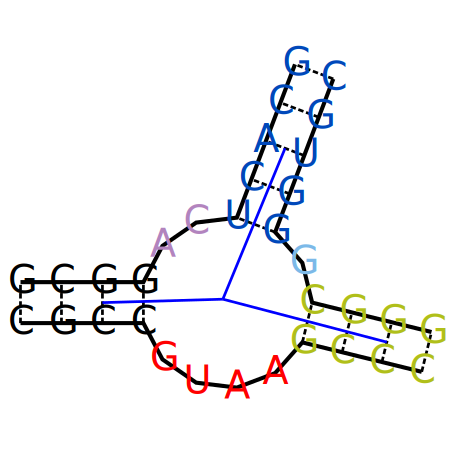

File removed to keep cwd clean, keep_svg=True to keep
Structure svg file: 4v8a_3WJ_BA-1295_BA-1306_BA-1622_BA-1631_BA-1635_BA-1645.svg


In [12]:
_ = show_structure(df, svg=True)  # Braucht Internet, kann etwas dauern

Ein paar exotische Beispiele:

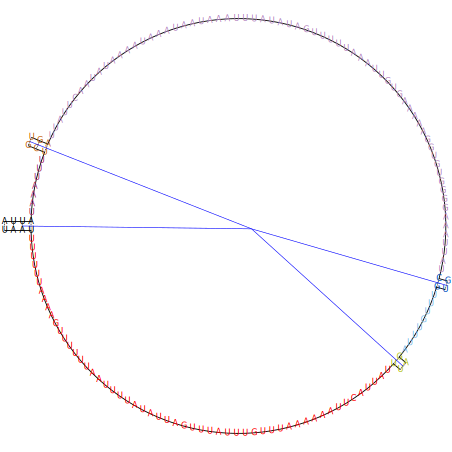

File removed to keep cwd clean, keep_svg=True to keep
Structure svg file: 7ane_4WJ_2-22_2-93_2-127_2-138_2-143_2-216_2-252_2-265.svg


In [101]:
large = df[df.strand_1_nts > 50]
_ = show_structure(large, svg=True)

In [119]:
small = df[(df.loop_type == "3-way") # Structure without any stems
         & (df.strand_1_nts + df.strand_2_nts + df.strand_3_nts == 0)]

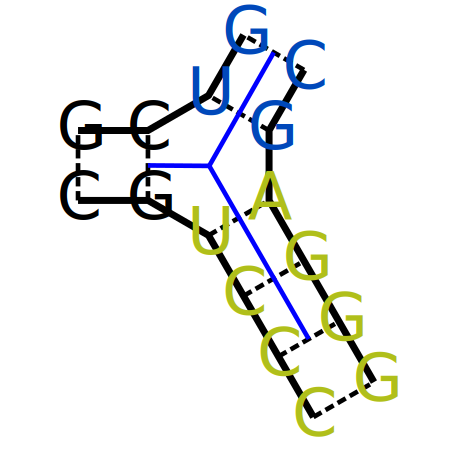

File removed to keep cwd clean, keep_svg=True to keep
Structure svg file: 6g90_3WJ_1-172_1-184_1-305_1-310_2-35_2-38.svg


In [120]:
_ = show_structure(small, svg=True)

## Übersicht der Daten

Nächster Schritt wäre jetzt Gruppen von Strukturen zu betrachten und Verteilungen der Feature explorativ zu untersuchen. \
Wechsel dazu der Übersichtlichkeit halber in eda_2.ipynb...